Context and Content<br><br>
A company which is active in Big Data and Data Science wants to hire data scientists among people who successfully pass some courses which conduct by the company. Many people signup for their training. Company wants to know which of these candidates are really wants to work for the company after training or looking for a new employment because it helps to reduce the cost and time as well as the quality of training or planning the courses and categorization of candidates. Information related to demographics, education, experience are in hands from candidates signup and enrollment.

This dataset designed to understand the factors that lead a person to leave current job for HR researches too. By model(s) that uses the current credentials,demographics,experience data you will predict the probability of a candidate to look for a new job or will work for the company, as well as interpreting affected factors on employee decision.

The whole data divided to train and test . Target isn't included in test but the test target values data file is in hands for related tasks. A sample submission correspond to enrollee_id of test set provided too with columns : enrollee _id , target

Note:<br><br>

The dataset is imbalanced.
Most features are categorical (Nominal, Ordinal, Binary), some with high cardinality.
Missing imputation can be a part of your pipeline as well.
Features

enrollee_id : Unique ID for candidate

city: City code

city_ development _index : Developement index of the city (scaled)

gender: Gender of candidate

relevent_experience: Relevant experience of candidate

enrolled_university: Type of University course enrolled if any

education_level: Education level of candidate

major_discipline :Education major discipline of candidate

experience: Candidate total experience in years

company_size: No of employees in current employer's company

company_type : Type of current employer

lastnewjob: Difference in years between previous job and current job

training_hours: training hours completed

target: 0 – Not looking for job change, 1 – Looking for a job change

Inspiration
Predict the probability of a candidate will work for the company
Interpret model(s) such a way that illustrate which features affect candidate decision

In [607]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [608]:
df = pd.read_csv('C:/Users/patel/Downloads/archive/aug_train.csv')

In [609]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [610]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


First We check which columns are important or which are not important for our model.look at the rows we found that our target attribute (target attribute predict that a person looking for a new job or work for our company) it's not depended on the enrollment no and city also so we drop that columns

In [611]:
df_preproceesing = df.drop(['enrollee_id','city'],axis=1)

In [612]:
df_preproceesing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city_development_index  19158 non-null  float64
 1   gender                  14650 non-null  object 
 2   relevent_experience     19158 non-null  object 
 3   enrolled_university     18772 non-null  object 
 4   education_level         18698 non-null  object 
 5   major_discipline        16345 non-null  object 
 6   experience              19093 non-null  object 
 7   company_size            13220 non-null  object 
 8   company_type            13018 non-null  object 
 9   last_new_job            18735 non-null  object 
 10  training_hours          19158 non-null  int64  
 11  target                  19158 non-null  float64
dtypes: float64(2), int64(1), object(9)
memory usage: 1.8+ MB


Now We preprocess our data.

1.handle missing values

In [613]:
print(pd.DataFrame(df_preproceesing.isnull().sum()/len(df_preproceesing)*100,columns=['missing values in %']))

                        missing values in %
city_development_index             0.000000
gender                            23.530640
relevent_experience                0.000000
enrolled_university                2.014824
education_level                    2.401086
major_discipline                  14.683161
experience                         0.339284
company_size                      30.994885
company_type                      32.049274
last_new_job                       2.207955
training_hours                     0.000000
target                             0.000000


In [614]:
df_object_columns = list(df_preproceesing.select_dtypes(['object']).columns)
df_object_columns_unique_value = [list(df_preproceesing[i].unique()) for i in df_object_columns]

These all are unique values which are presents in all categorical features.please ingone the nan value<br><br>
[['Male', nan, 'Female', 'Other'],
 ['Has relevent experience', 'No relevent experience'],
 ['no_enrollment', 'Full time course', nan, 'Part time course'],
 ['Graduate', 'Masters', 'High School', nan, 'Phd', 'Primary School'],
 ['STEM', 'Business Degree', nan, 'Arts', 'Humanities', 'No Major', 'Other'],
 ['>20',
  '15',
  '5',
  '<1',
  '11',
  '13',
  '7',
  '17',
  '2',
  '16',
  '1',
  '4',
  '10',
  '14',
  '18',
  '19',
  '12',
  '3',
  '6',
  '9',
  '8',
  '20',
  nan],
 [nan,
  '50-99',
  '<10',
  '10000+',
  '5000-9999',
  '1000-4999',
  '10/49',
  '100-500',
  '500-999'],
 [nan,
  'Pvt Ltd',
  'Funded Startup',
  'Early Stage Startup',
  'Other',
  'Public Sector',
  'NGO'],
 ['1', '>4', 'never', '4', '3', '2', nan]]

In [615]:
def piechart(column_name,labels):
    plt.figure(figsize=(8,8))
    plt.pie(df_preproceesing[column_name].value_counts(),shadow=True,labels=labels,autopct = '%1.2f%%')

Like This we can plot any feature

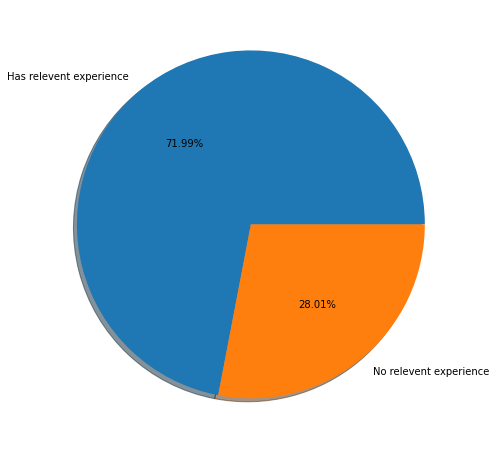

In [616]:
piechart('relevent_experience',['Has relevent experience', 'No relevent experience'])

we assume that in gender feature all nan values are treat as Other category

In [617]:
df_preproceesing['gender'] = df_preproceesing['gender'].fillna("Other")
df_preproceesing['relevent_experience'] = df_preproceesing['relevent_experience'].fillna("No relevent experience")
df_preproceesing['enrolled_university'] = df_preproceesing['enrolled_university'].fillna("no_enrollment")
df_preproceesing['experience'] = df_preproceesing['experience'].fillna("<1")
df_preproceesing['company_size'] = df_preproceesing['company_size'].fillna("<10")
df_preproceesing['last_new_job'] = df_preproceesing['last_new_job'].fillna("never")

Basically if we have categorical feature with Nan value then we fill them with mode of that feature

and if we have numrical feature than we first check distrubation if there is normal distrubation then we fill with mean otherwise we fill missing value with median

This is basically fill a mode value at missing place

In [618]:
for i in df_object_columns:
    m =  df_preproceesing[i].mode()[0]
    df_preproceesing[i] = df_preproceesing[i].fillna(m)

Now we check number of increment or decrement in particular categorie

<AxesSubplot:xlabel='last_new_job', ylabel='count'>

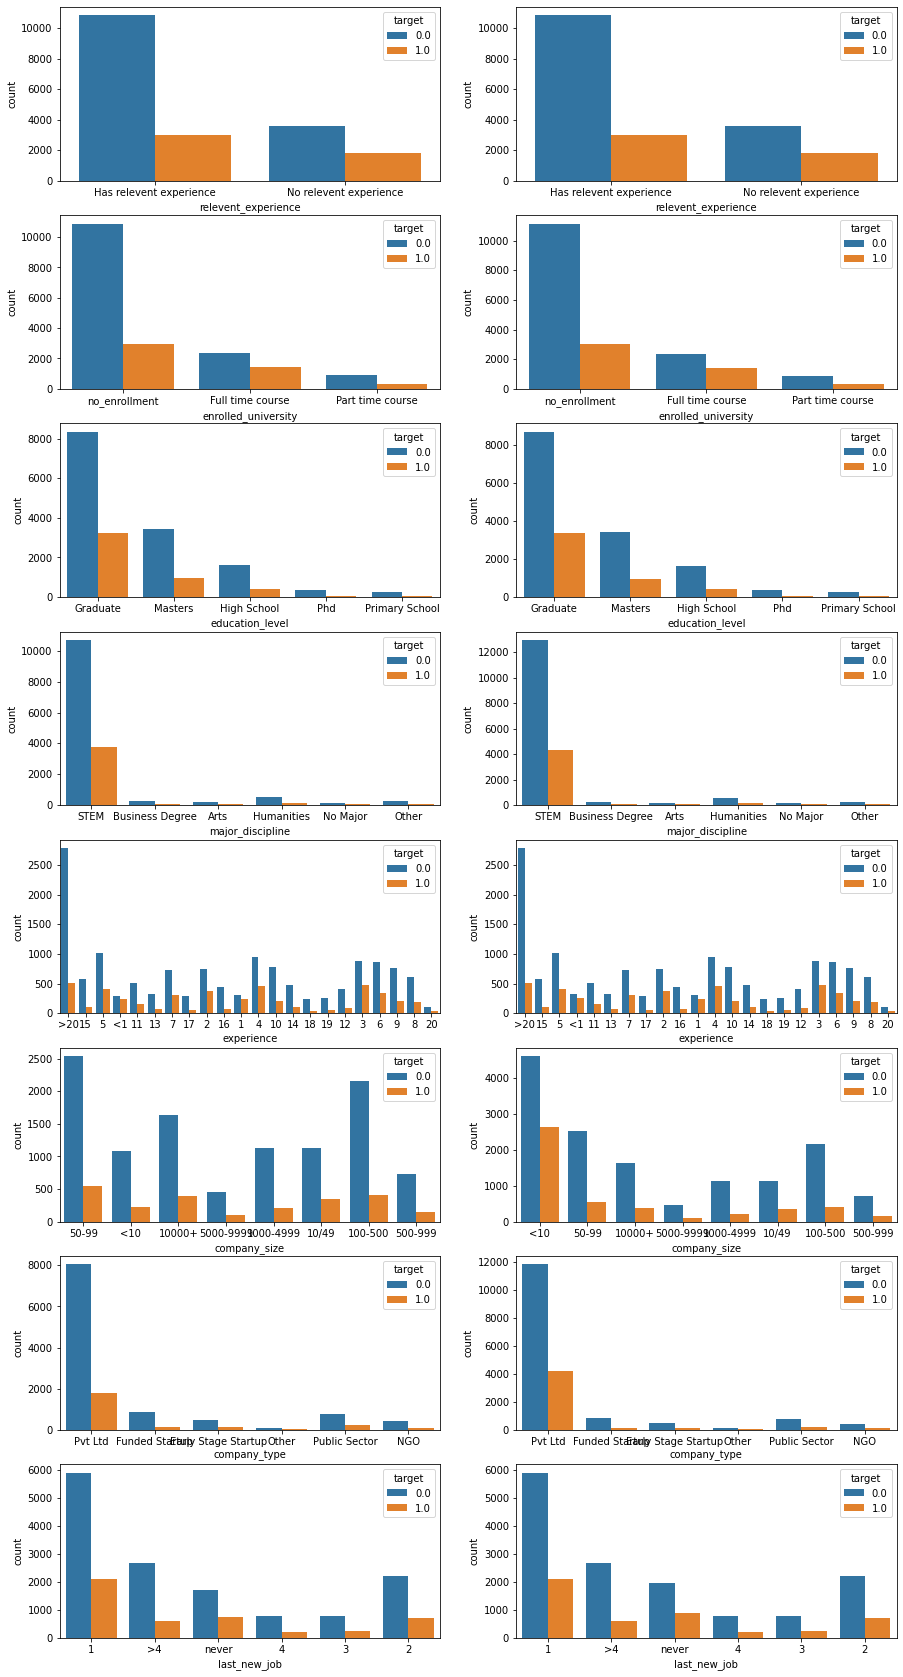

In [619]:
fig, axs = plt.subplots(nrows=8,ncols=2, figsize=(15,30))
sns.countplot(x="relevent_experience",hue='target', data=df, ax=axs[0,0])
sns.countplot(x="relevent_experience",hue='target', data=df_preproceesing, ax=axs[0,1])
sns.countplot(x="enrolled_university",hue='target', data=df, ax=axs[1,0])
sns.countplot(x="enrolled_university",hue='target', data=df_preproceesing, ax=axs[1,1])
sns.countplot(x="education_level",hue='target', data=df, ax=axs[2,0])
sns.countplot(x="education_level",hue='target', data=df_preproceesing, ax=axs[2,1])
sns.countplot(x="major_discipline",hue='target', data=df, ax=axs[3,0])
sns.countplot(x="major_discipline",hue='target', data=df_preproceesing, ax=axs[3,1])
sns.countplot(x="experience",hue='target', data=df, ax=axs[4,0])
sns.countplot(x="experience",hue='target', data=df_preproceesing, ax=axs[4,1])
sns.countplot(x="company_size",hue='target', data=df, ax=axs[5,0])
sns.countplot(x="company_size",hue='target', data=df_preproceesing, ax=axs[5,1])
sns.countplot(x="company_type",hue='target', data=df, ax=axs[6,0])
sns.countplot(x="company_type",hue='target', data=df_preproceesing, ax=axs[6,1])
sns.countplot(x="last_new_job",hue='target', data=df, ax=axs[7,0])
sns.countplot(x="last_new_job",hue='target', data=df_preproceesing, ax=axs[7,1])

Now we encode our data using ordinalencoder or onehotencoding

In [620]:
for i in df_object_columns:
    print(f"{i} : {len(df_preproceesing[i].unique())} categories")

gender : 3 categories
relevent_experience : 2 categories
enrolled_university : 3 categories
education_level : 5 categories
major_discipline : 6 categories
experience : 22 categories
company_size : 8 categories
company_type : 6 categories
last_new_job : 6 categories


<h3>First we encoding all ordinal categorical variable using this code</h3><br><br>
(ordinal means a categorical value with an order like a good,bad,andvery good that means we can assume that a bad is like 0 , good is like 1, and very good is like 2)

In [621]:
gender_map = {
    "Male": 0,
    "Female": 1,
    "Other": 2
}

In [622]:
relevent_experience_map = {
    "No relevent experience": 0,
    "Has relevent experience": 1
}

In [623]:
enrolled_university_map = {
    "no_enrollment": 0,
    "Full time course": 2,
    "Part time course": 1
}

In [624]:
education_level_map = {
    "High School": 1,
    "Primary School" :0,
    "Phd":4, 
    "Masters": 3,
    "Graduate": 2
}

In [625]:
major_discipline_map = {
    "STEM": 0,
    "Humanities": 1,
    "Other": 2,
    "Business Degree": 3,
    "Arts": 4,
    "No Major": 5
}

In [626]:
experience_map = {
    "<1": 0,
    "1": 1,
    "2": 2,
    "3": 3,
    "4": 4,
    "5": 5,
    "6": 6,
    "7": 7,
    "8": 8,
    "9": 9,
    "10": 10,
    "11": 11,
    "12": 12,
    "13": 13,
    "14": 14,
    "15": 15,
    "16": 16,
    "17": 17,
    "18": 18,
    "19": 19,
    "20": 20,
    ">20": 21,
}

In [627]:
company_size_map = {
    "<10": 0,
    "10/49": 1,
    "50-99": 2,
    "100-500": 3,
    "500-999": 4,
    "1000-4999": 5,
    "5000-9999": 6,
    "10000+": 7
}

In [628]:
company_type_map = {
    "Pvt Ltd": 0,
    "Funded Startup": 1,
    "Public Sector": 2,
    "Early Stage Startup": 3,
    "NGO": 4,
    "Other": 5,
}

In [629]:
last_new_job_map = {
    "never": 0,
    "1": 1,
    "2": 2,
    "3": 3,
    "4": 4,
    ">4": 5,
}

In [630]:
df_preproceesing.gender = df_preproceesing.gender.map(gender_map)
df_preproceesing.relevent_experience = df_preproceesing.relevent_experience.map(relevent_experience_map)
df_preproceesing.enrolled_university = df_preproceesing.enrolled_university.map(enrolled_university_map)
df_preproceesing.education_level = df_preproceesing.education_level.map(education_level_map)
df_preproceesing.major_discipline = df_preproceesing.major_discipline.map(major_discipline_map)
df_preproceesing.experience = df_preproceesing.experience.map(experience_map)
df_preproceesing.company_size = df_preproceesing.company_size.map(company_size_map)
df_preproceesing.company_type = df_preproceesing.company_type.map(company_type_map)
df_preproceesing.last_new_job = df_preproceesing.last_new_job.map(last_new_job_map)

In [631]:
df_preproceesing.education_level.value_counts()

2    12058
3     4361
1     2017
4      414
0      308
Name: education_level, dtype: int64

In [632]:
df_preproceesing.head()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,0.920,0,1,0,2,0,21,0,0,1,36,1.0
1,0.776,0,0,0,2,0,15,2,0,5,47,0.0
2,0.624,2,0,2,2,0,5,0,0,0,83,0.0
3,0.789,2,0,0,2,3,0,0,0,0,52,1.0
4,0.767,0,1,0,3,0,21,2,1,4,8,0.0


In [633]:
x = df_preproceesing.iloc[:,:-1]
y = df_preproceesing.iloc[:,-1]

In [660]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

sc = StandardScaler()

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [661]:
x = pd.DataFrame(sc.fit_transform(x),columns=['city_development_index','gender','relevent_experience','enrolled_university','education_level','major_discipline','experience','company_size','company_type','last_new_job','training_hours'])

In [662]:
from sklearn.svm import SVC

In [680]:
model = SVC()

In [681]:
model.fit(x_train,y_train)

SVC()

In [682]:
model.score(x_test,y_test)

0.7690501043841336

<h2>important message:- </h2>
In this data i were only focused on just data cleaning ot data analysis dont mind about the low accuracy.int next project i will do one step ahed like which model best for our data which one give us best accuracy etc.